In [1]:
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [4]:
def RemoveEmpty(dic):
    delind = []
    for val in dic:
        if dic[val] == '':
            delind.append(val)
    for i in delind:
        del dic[i]
    return dic

In [5]:
kappa = RemoveEmpty(pickle.load(open("doc.p", "rb")))
data = []
for key in kappa:
    data.append(kappa[key])  
tfidf = TfidfVectorizer()
data = tfidf.fit_transform(data).toarray()

In [18]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
%matplotlib inline

Для представления расстояний используется треугольная матрица расстояний, свернутая в одномерный массив: 
https://stackoverflow.com/questions/13079563/how-does-condensed-distance-matrix-work-pdist
(сворачивание осуществляется построчно, слева направо)


In [27]:
squareform(dist)[0][1:].min()

0.74342827752534579

hierarchy.linkage возвращает 4-х мерный массив по всем объектам. $i$-ая строка, $m + i$ - ый кластер. Стболбцы Z[0], Z[1] содержат номера исходных объектов, образующих кластер. Z[2] - расстояние между кластерами Z[0] и Z[1]. Z[3] - количество исходных простых (единичных) кластеров.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


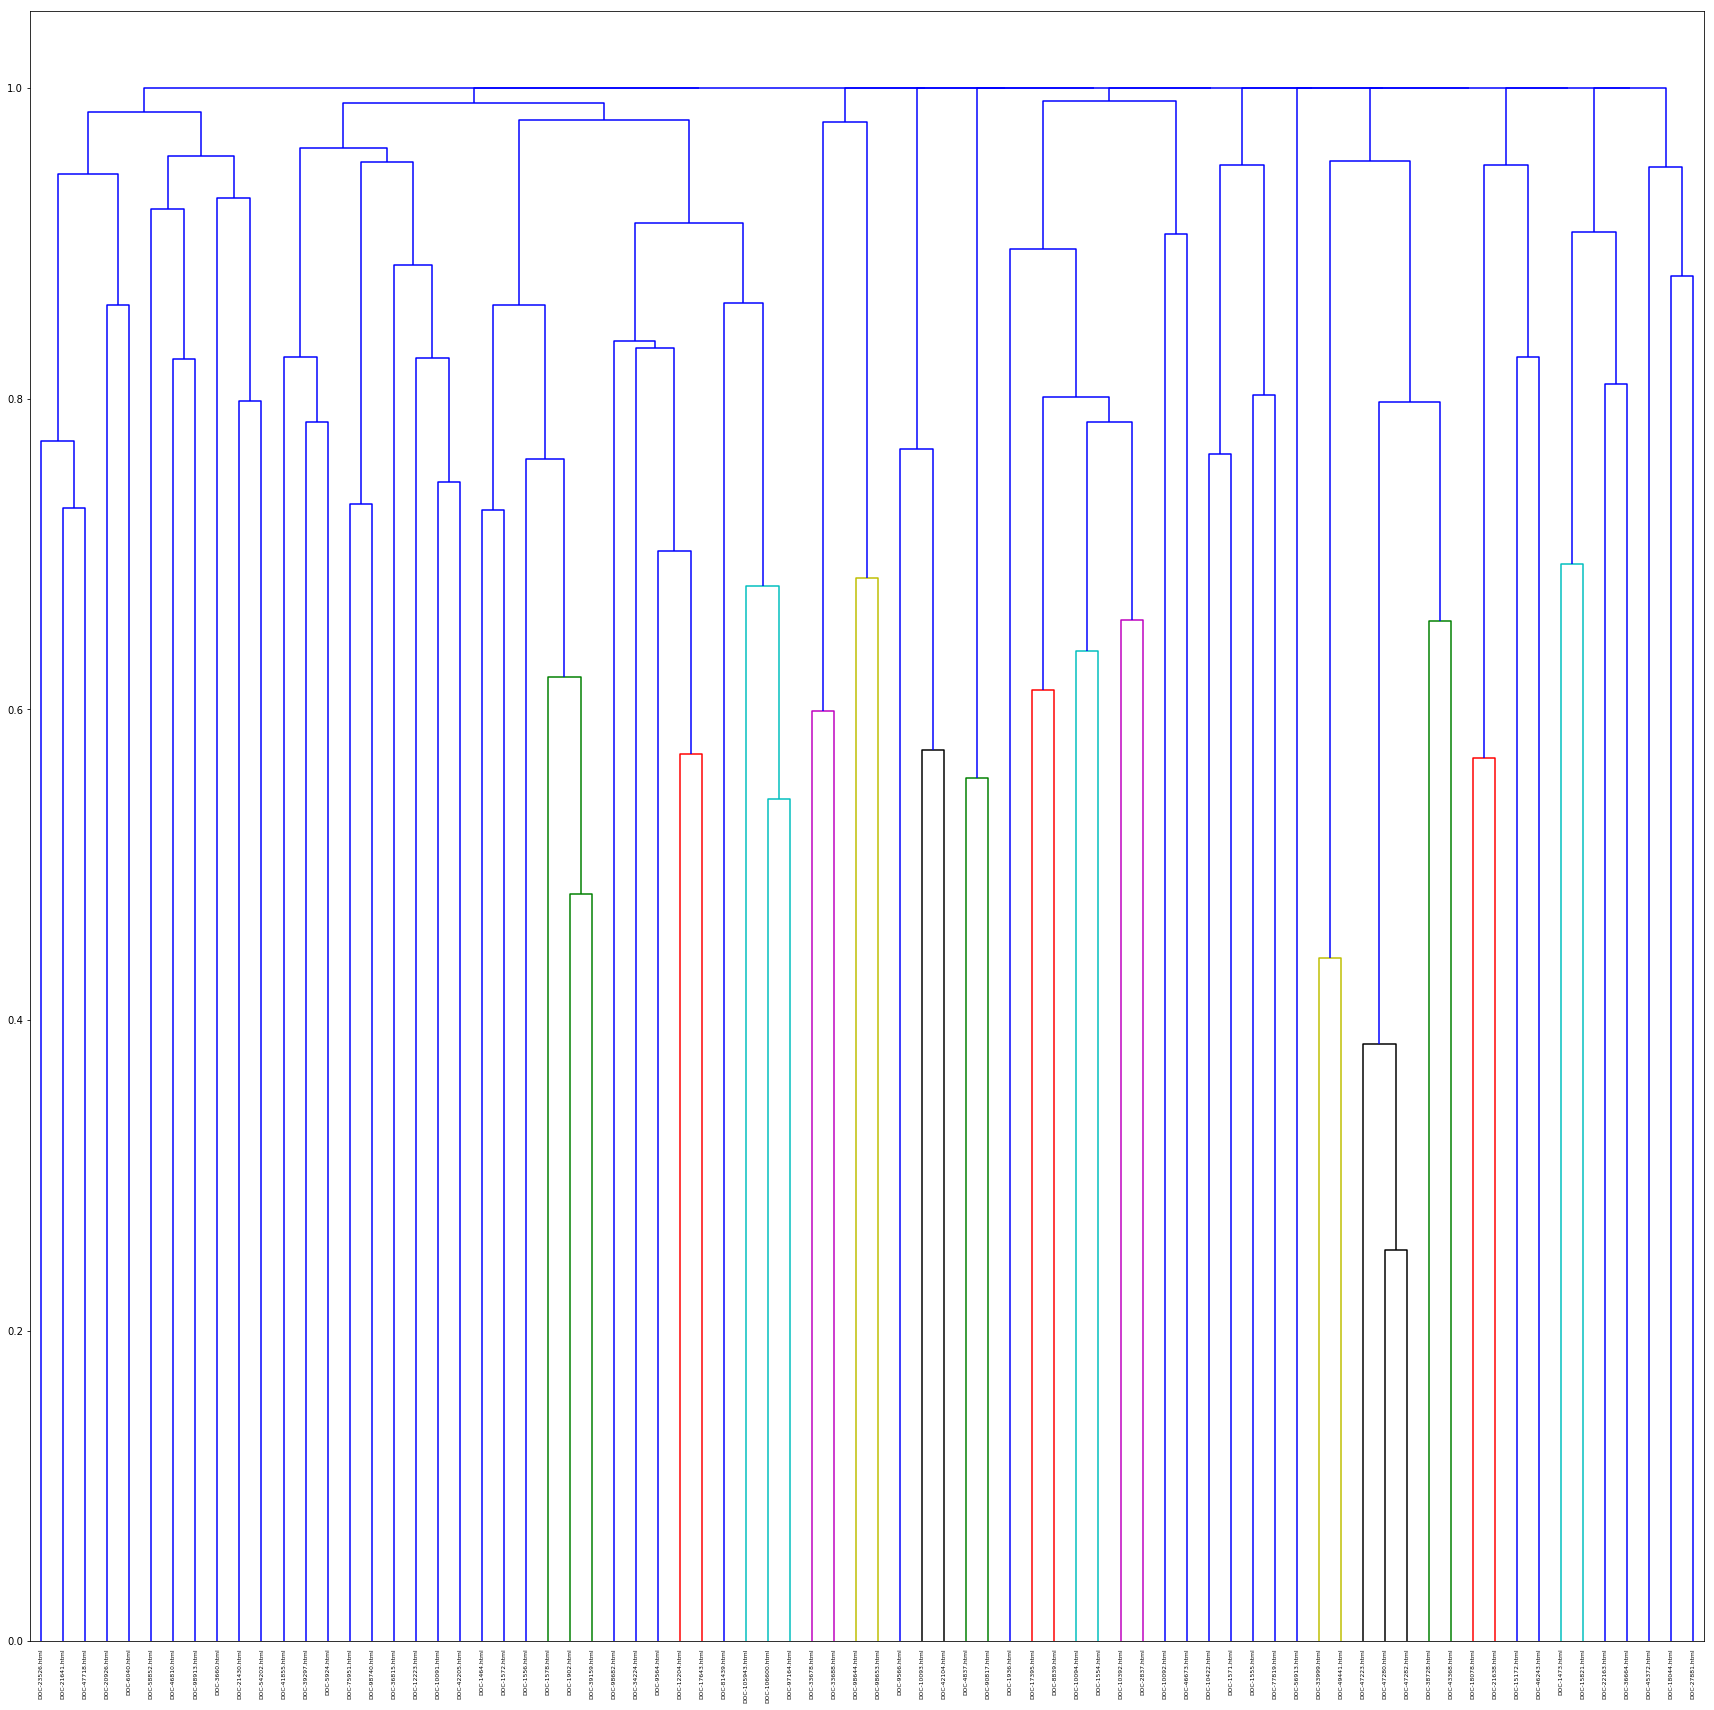

In [87]:
def draw():
    labs = np.array(range(10))
    dist = pdist(data, 'cosine')
    Z = hierarchy.linkage(dist, method='complete') #complete - max($\rho_i$)
    a = plt.figure(figsize=(30, 30))
    plt.legend(loc=2, prop={'size': 20})
    hierarchy.dendrogram(Z, labels = list(kappa.keys()), color_threshold = 0.7*max(Z[:,2]))
    a.show()
    a.savefig('dendr.pdf')
draw()

In [61]:
list(kappa.keys()).index('DOC-47282.html')

54

In [60]:
list(kappa.values())[53]

'проект пиар согласование маркетинг согласование юрист согласование дк проект пиар проект проходить согласование маркетинг маркетинг решать пиарить проект данный возможность согласовать юрист дк существовать проект автоматически приходить этап согласование маркетинг относиться проект выполнить последний остальной проект автоматически переходить этап согласование маркетинг проект маркетинг самостоятельно найти начать согласование участие пиар проект плата стартовать процесс сбор проектный опыт раздел проектный опыт крок карточка проект отобразить статус сантиметр рисунок рисунок карточка проектный опыт требовать согласование участие маркетинговый активность следовательно согласование юрист дк проект использовать маркетинговый активность редактирование дать проект отправка согласование участие маркетинговый активность необходимый нажать кнопка зелёный цвет изменить проектный опыт сантиметр рисунок далее сотрудник маркетинг приходить нотификация почта согласование маркетинг сотрудник марк

In [62]:
list(kappa.values())[54]

'проект департамент маркетинг принять решение использовать маркетинговый активность обязательно проходить согласование юрист дк юрист принимать решение основание заключённый договор соглашение дк принимать решение основание взаимодействие клиент согласующий дк ожидаться принятие решение возможность использование проект маркетинговый активность дк принять следующий решение проект участвовать маркетинговый активность упомянуть участие заказчик дать проект использовать содержание работа наименование заказчик далее проект единичный проект участвовать маркетинговый активность использовать любой дать проект люба комбинация проект участвовать маркетинговый активность ограничение дк принимать решение подробно описывать комментарий дать использовать пиар деятельность сантиметр пример рис рисунок пример заполнение форма принятие решение отображаться карточка проектный опыт рисунок рисунок маркетинг использовать проект пиар деятельность ограничение рисунок маркетинг использовать никакой дать прое